# Importation des données



In [ ]:
#sur chaque catégorie de produit regarder le délai de livraison, donc augmenter la date de livraison estimée

In [ ]:
#augmenter la qualité du produit 

In [ ]:
#Délai de livraison en fonction des états 

In [ ]:
#sum(order_reviews_dataset['review_id'].duplicated())

In [ ]:
#order_review_dataset

In [ ]:
#order_reviews_dataset drop_duplicated(subset = 'order_id', keep = 'last')

In [ ]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Ici, nous téléchargeons le fichier de GitHub 
r = requests.get('https://github.com/murpi/olist/blob/master/olist.sqlite.zip?raw=true')
open('olist.sqlite.zip', 'wb').write(r.content)

# Puis on le décompresse
with zipfile.ZipFile("olist.sqlite.zip","r") as zip_ref:
    zip_ref.extractall()

# Nous nous connectons à la base de données
conn = sqlite3.connect('olist.sqlite')



In [ ]:
# Voici une requête spécifique pour lister le nom des tables
cursor = conn.cursor()
schema = cursor.execute("SELECT * FROM sqlite_master where type='table'").fetchall()
pd.DataFrame(schema, columns = ["type", "name", "table_name", "rootpage", "SQL"])

,type,name,table_name,rootpage,SQL
0,table,customers_dataset,customers_dataset,2,"CREATE TABLE ""customers_dataset"" (\n\t""custome..."
1,table,product_category_name_translation,product_category_name_translation,2236,"CREATE TABLE ""product_category_name_translatio..."
2,table,sellers_dataset,sellers_dataset,2237,"CREATE TABLE ""sellers_dataset"" (\n\t""seller_id..."
3,table,products_dataset,products_dataset,2282,"CREATE TABLE ""products_dataset"" (\n\t""product_..."
4,table,orders_dataset,orders_dataset,2859,"CREATE TABLE ""orders_dataset"" (\n\t""order_id""\..."
5,table,order_reviews_dataset,order_reviews_dataset,7391,"CREATE TABLE ""order_reviews_dataset"" (\n\t""rev..."
6,table,order_payments_dataset,order_payments_dataset,11053,"CREATE TABLE ""order_payments_dataset"" (\n\t""or..."
7,table,order_items_dataset,order_items_dataset,12645,"CREATE TABLE ""order_items_dataset"" (\n\t""order..."
8,table,geolocation_dataset,geolocation_dataset,16680,"CREATE TABLE ""geolocation_dataset"" (\n\t""geolo..."


In [ ]:
# Et maintenant nous pouvons afficher avec Pandas le résultat de n'importe quelle requête
# Par exemple :
df = pd.read_sql("select * from geolocation_dataset ", conn)


In [ ]:

customers_dataset_sql = pd.read_sql("select * from customers_dataset", conn)
customers_dataset_sql
#customers_dataset_sql.duplicated().sum()
#customers_dataset_sql.isnull().sum()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
product_category_name_translation_dataset_sql = pd.read_sql("select * from product_category_name_translation", conn)
product_category_name_translation_dataset_sql.duplicated().sum()
#product_category_name_translation_dataset_sql.isnull().sum()

0

In [ ]:
sellers_dataset_sql =  pd.read_sql("select * from sellers_dataset", conn)
sellers_dataset_sql.duplicated().sum()
#sellers_dataset_sql['seller_city'].astype('category')
#sellers_dataset_sql['seller_state'].astype('category')

0

In [ ]:
products_dataset_sql =  pd.read_sql("select * from products_dataset", conn)
#products_dataset_sql.isnull().sum()
products_dataset_sql.duplicated().sum()

0

In [ ]:
orders_dataset_sql = pd.read_sql("select * from orders_dataset", conn)
orders_dataset_sql.duplicated().sum()
orders_dataset_sql

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
order_reviews_dataset_sql = pd.read_sql("select * from order_reviews_dataset", conn)
order_reviews_dataset_sql
#order_reviews_dataset_sql['review_comment_title'].isnull().sum()
#order_reviews_dataset_sql.duplicated().sum()
#condition=order_reviews_dataset_sql['review_score']=='1'


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
comments_1=order_reviews_dataset_sql[(order_reviews_dataset_sql["review_score"]==1) | (order_reviews_dataset_sql["review_score"]==2) | (order_reviews_dataset_sql["review_score"]==3)]
comments_1["review_score"].value_counts()
argent_perdu_1 = 114424*100
argent_perdu_2 = 8179*50
argent_perdu_3 = 3151*40
argent_perdu = argent_perdu_1+argent_perdu_2+argent_perdu_3
print(argent_perdu)

11977390


In [ ]:
order_payments_dataset_sql = pd.read_sql("select * from order_payments_dataset", conn)
#order_payments_dataset_sql.isnull().sum()
order_payments_dataset_sql.duplicated().sum()

0

#Liason entre les différentes tables


In [ ]:
order_items_dataset_sql = pd.read_sql("select * from order_items_dataset", conn)
#order_items_dataset_sql.isnull().sum()
order_items_dataset_sql.duplicated().sum()
order_items_dataset_sql

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
df2 = pd.merge(orders_dataset_sql, order_reviews_dataset_sql, how = 'inner', on = 'order_id')
df2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,None,None,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,None,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5,None,None,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e262b3f92d1ce917aa412a9406cf61a6,5,None,None,2017-03-22 00:00:00,2017-03-23 11:02:08
99220,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4,None,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
99221,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5,None,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
99222,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,None,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


In [ ]:
df_3 = pd.merge(df2, order_items_dataset_sql, how = 'inner', on = 'order_id')
df_3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,None,None,2018-08-18 00:00:00,2018-08-22 19:07:58,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,None,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5,None,None,2018-02-17 00:00:00,2018-02-18 13:02:51,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4,None,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112368,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5,None,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112369,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,None,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112370,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,None,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.

In [ ]:
df_3.loc[df_3['review_score']<4]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,None,None,2017-05-09 00:00:00,e07549ef5311abcc92ba1784b093fb56,2,None,fiquei triste por n ter me atendido.,2017-05-13 00:00:00,2017-05-13 20:25:42,1,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,fc4af8aea8ec3f1a3cd181d3d0cadbd5,1,None,None,2017-02-03 00:00:00,2017-02-05 01:58:35,1,ac1789e492dcd698c5c10b97a671243a,63b9ae557efed31d1f7687917d248a8d,2017-01-27 18:29:09,19.90,16.05
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,15898b543726a832d4137fbef5d1d00e,1,None,Aguardando retorno da loja,2017-05-30 00:00:00,2017-05-30 23:13:47,1,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-22 19:50:18,99.00,30.53
11,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,15898b543726a832d4137fbef5d1d00e,1,None,Aguardando retorno da loja,2017-05-30 00:00:00,2017-05-30 23:13:47,2,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-22 19:50:18,99.00,30.53
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28 00:00:00,38cae21b1b57a95959440380d5b2ef7a,2,None,os correios estäo em greve... näo recebi nenhu...,2017-10-01 00:00:00,2017-10-01 17:55:21,1,5ac9d9e379c606e36a8094a6046f75dc,633ecdf879b94b5337cca303328e4a25,2017-09-25 04:04:09,109.90,8.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112352,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31 00:00:00,4a57b77d844594f24904a568218a2d96,1,None,nao recebi o produto que ja paguei ! nao recom...,2017-11-03 00:00:00,2017-11-06 18:50:22,1,014a8a503291921f7b004a5215bb3c36,fa40cc5b934574b62717c68f3d678b6d,2017-10-19 04:28:24,36.90,11.85
112354,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09 00:00:00,6b2ee488cd87d8a9ee67eb63ad5a7a4c,1,None,"Prateleiras com cantos vivo, colunas nao encai...",2018-04-11 00:00:00,2018-04-11 12:41:03,1,58efb9b638561ce132216a9a612513e2,701938c450705b8ae65fc923b70f35c7,2018-03-27 20:05:26,109.97,36.86
112361,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,8ea780895f362ce949029f95b7181ff0,1,None,"Ele não é um mini cajon, é um shaker, ou seja,...",2018-01-19 00:00:00,2018-01-21 02:51:39,1,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,2017-12-27 10:09:52,55.90,15.14
112369,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,None,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40

In [ ]:
products_dataset_sql

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


#Analyse exploratoire

In [ ]:
df_4 = pd.merge(df_3,products_dataset_sql, how = 'inner', on = 'product_id')
df_categorie_de_produits = df_4[['product_category_name', 'review_score']]
x=pd.DataFrame(df_categorie_de_produits.groupby('product_category_name')['review_score'].mean())
x.sort_values(by="review_score", ascending=False)

,review_score
product_category_name,
cds_dvds_musicais,4.642857
fashion_roupa_infanto_juvenil,4.500000
livros_interesse_geral,4.446266
construcao_ferramentas_ferramentas,4.444444
flores,4.419355
...,...
moveis_escritorio,3.493183
pc_gamer,3.333333
portateis_cozinha_e_preparadores_de_alimentos,3.266667


In [ ]:
df_4

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,b46f1e34512b0f4c74a72398b03ca788,4,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,dc90f19c2806f1abba9e72ad3c350073,5,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1bafb430e498b939f258b9c9dbdff9b1,3,...,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,f5453b3d33358ed459eb4312392b96a8,4,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
112368,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,f5453b3d33358ed459eb4312392b96a8,4,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
112369,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,8ea780895f362ce949029f95b7181ff0,1,...,55.90,15.14,instrumentos_musicais,34.0,372.0,2.0,300.0,16.0,6.0,12.0
112370,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e262b3f92d1ce917aa412a9406cf61a6,5,...,72.00,13.08,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0


In [ ]:
df_4.groupby('product_category_name')['review_score'].count()>200

product_category_name
agro_industria_e_comercio     True
alimentos                     True
alimentos_bebidas             True
artes                         True
artes_e_artesanato           False
                             ...  
sinalizacao_e_seguranca      False
tablets_impressao_imagem     False
telefonia                     True
telefonia_fixa                True
utilidades_domesticas         True
Name: review_score, Length: 73, dtype: bool

In [ ]:
df_dimension_review = df_4[['product_width_cm','product_height_cm','product_length_cm','product_weight_g', 'review_score']]
df_dimension_review

,product_width_cm,product_height_cm,product_length_cm,product_weight_g,review_score
0,13.0,8.0,19.0,500.0,4
1,13.0,8.0,19.0,500.0,4
2,13.0,8.0,19.0,500.0,5
3,13.0,8.0,19.0,500.0,3
4,19.0,13.0,19.0,400.0,4
...,...,...,...,...,...
112367,23.0,23.0,28.0,2800.0,4
112368,23.0,23.0,28.0,2800.0,4
112369,12.0,6.0,16.0,300.0,1
112370,18.0,13.0,22.0,1175.0,5


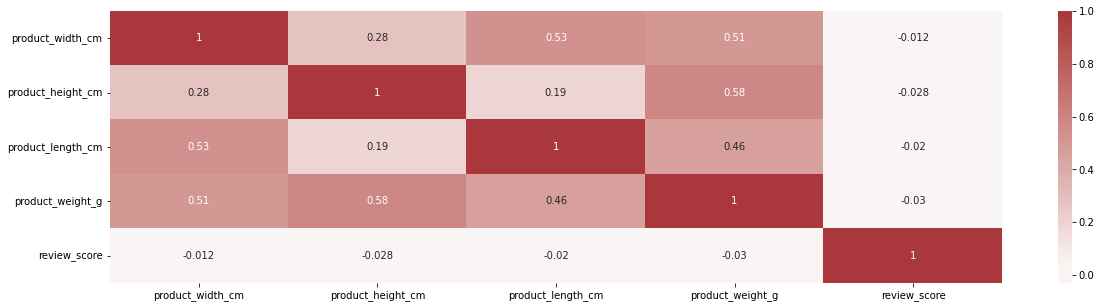

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
sns.heatmap(df_dimension_review.corr(), cmap = 'vlag', center = 0, annot = True)

In [ ]:
df_descriptif_review = df_4[['product_photos_qty'	,'product_description_lenght', 'review_score']]
df_descriptif_review

,product_photos_qty,product_description_lenght,review_score
0,4.0,268.0,4
1,4.0,268.0,4
2,4.0,268.0,5
3,4.0,268.0,3
4,1.0,178.0,4
...,...,...,...
112367,1.0,1105.0,4
112368,1.0,1105.0,4
112369,2.0,372.0,1
112370,1.0,1517.0,5


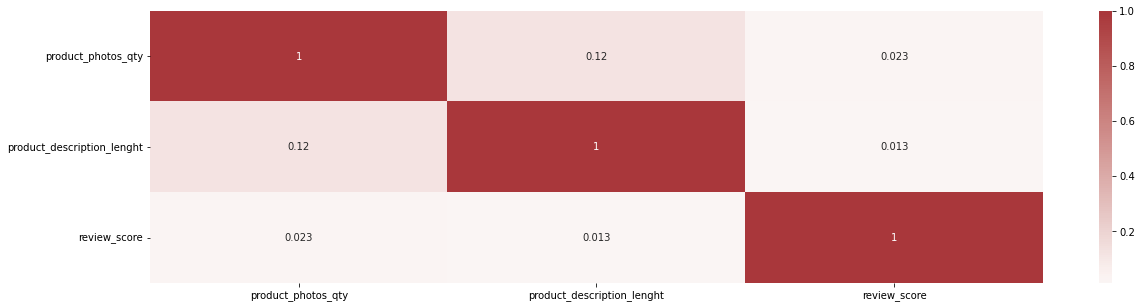

In [ ]:
plt.figure(figsize=(20, 5))
sns.heatmap(df_descriptif_review.corr(), cmap = 'vlag', center = 0, annot = True)

In [ ]:
df_5 = pd.merge(df_3,sellers_dataset_sql, how = 'inner', on = 'seller_id' )
df_5

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP
1,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,b8238c6515192f8129081e17dc57d169,5,...,2017-08-21 12:43:27,1,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,9350,maua,SP
2,a0151737f2f0c6c0a5fd69d45f66ceea,fc2697314ab7fbeda62bb6f1afa4efcd,delivered,2017-07-12 14:11:58,2017-07-12 14:30:18,2017-07-13 12:47:05,2017-07-18 16:24:42,2017-07-25 00:00:00,fa5bf792d42ed25f80c54d18aeaa83de,4,...,2017-07-24 13:59:59,1,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,2017-07-18 14:30:18,44.99,7.78,9350,maua,SP
3,a3bf941183211246f0d42ad757cba127,3718e1873d5dc3e8d96c0ab783278b02,delivered,2017-07-24 22:16:25,2017-07-25 22:25:11,2017-07-26 14:57:42,2017-07-28 19:06:46,2017-08-04 00:00:00,5fe3f65882f521f0fbc41e59b9fbff24,4,...,2017-08-01 20:06:40,1,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,2017-07-31 22:25:11,44.99,7.78,9350,maua,SP
4,1462290799412b71be32dd880eaf4e1b,220e4b027f0294fd79d2869ef67e7db6,delivered,2017-08-19 14:06:58,2017-08-22 04:10:55,2017-08-23 13:54:29,2017-08-29 19:35:06,2017-09-15 00:00:00,36f6f70dc5e67e8e43b109cae0e92d40,4,...,2017-08-31 02:21:39,1,d7faab3fa0091d1220a8ada9cae1bab3,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-28 04:10:55,29.90,14.10,9350,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,7f9849fcbfdf9fa3070c05b5501bf066,5,...,2018-07-10 18:32:29,1,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,13660,porto ferreira,SP
112368,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,None,None,2017-03-30 00:00:00,c950324a42c5796d06f569f77d8b2e88,1,...,2017-04-01 10:24:03,1,241a1ffc9cf969b27de6e72301020268,8501d82f68d23148b6d78bb7c4a42037,2017-03-16 19:51:36,19.70,10.96,89031,blumenau,SC
112369,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,19f21ead7ffe5b1b5147a7877c22bae5,5,...,2018-08-04 11:22:40,1,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,13478,americana,SP
112370,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,ec2817e750153dfdd61894780dfc5d9e,4,...,2018-06-13 09:17:47,1,6e1c2008dea1929b9b6c27fa01381e90,edf3fabebcc20f7463cc9c53da932ea8,2018-05-28 21:31:24,219.90,24.12,8320,sao paulo,SP


In [ ]:
df_5_mn = df_5.loc[df_5['review_score']<4]

In [ ]:
df_5_mn

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
16,1f201b2bf1eecbd0ad32c3f430846b84,856f3263eb7af3a48765c85d4d0eea1d,delivered,2017-09-26 21:32:17,2017-09-26 21:49:42,2017-09-28 15:28:03,2017-10-03 13:38:04,2017-10-11 00:00:00,677c67d89dafa61cb029b50d92a0686d,3,...,2017-10-06 18:30:17,1,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 21:49:42,48.90,11.73,9350,maua,SP
22,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1bafb430e498b939f258b9c9dbdff9b1,3,...,2017-11-10 19:52:38,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,9350,maua,SP
31,4ec007fa66327a51919a32d840b49395,37495158e596d9ed20f3a53e8beab81b,delivered,2017-10-15 13:09:03,2017-10-15 13:26:18,2017-10-17 16:35:53,2017-10-25 18:29:42,2017-11-03 00:00:00,630d83ef424ddd42bf268577526cd944,3,...,2017-10-31 20:48:12,1,a2e23998b013d26d049d721aa7a32e1b,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-19 13:26:18,24.99,14.10,9350,maua,SP
32,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,8899ca945efd951c97107b4966289227,1,...,2017-08-30 02:26:02,2,be03d93320192443b8fa24c0ca6ead98,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-30 11:45:25,46.80,67.70,9350,maua,SP
35,27bef9e280946001761b32ae6463dbe0,226f45581c1b5fe6ab7ac0d9e060a2c4,delivered,2017-08-10 15:28:01,2017-08-10 15:43:42,2017-08-11 13:52:34,2017-08-14 20:47:41,2017-08-23 00:00:00,65107a79b503715226e500d00366f89c,3,...,2017-08-16 10:07:42,1,a2e23998b013d26d049d721aa7a32e1b,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 15:43:42,24.99,7.78,9350,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112352,1449769412dea5d16183085a97ba3bca,18df50d79545e4b86e36986c7271156b,shipped,2018-03-23 20:22:36,2018-03-23 20:35:38,2018-04-03 22:38:24,None,2018-04-11 00:00:00,4f8c5b973f90cd061b0f049d574f0b51,1,...,2018-04-13 04:04:29,1,a925b7e3c4b81decf87f5e1f381da50b,d1e2fe627180431ffda076abb303c56f,2018-03-29 20:35:38,289.00,9.05,25900,rio de janeiro,RJ
112353,8505d7267ce3f58c129ffa8468cebf21,af81a8c415a28b1ba710741f8e2562fe,processing,2017-02-15 23:00:16,2017-02-15 23:10:12,None,None,2017-04-04 00:00:00,df06641f8f60201aa235c5ee7a5205f4,2,...,2017-04-06 09:50:52,1,9881e1d8024c8459494c134d29a42cd8,ace601496e211a664100321f038f50af,2017-03-06 22:00:16,165.00,14.92,2372,sao paulo,SP
112360,b1866dace5f7daf46e4ef10ed7c3a5e9,eb6cafe1788b71c7e4d0fb96b62c6cb7,delivered,2017-11-20 12:49:35,2017-11-20 13:07:31,2017-11-21 22:55:36,2017-12-27 00:06:56,2017-12-18 00:00:00,e5162d9f0c4aa94b9147401eef42faac,3,...,2017-12-19 10:31:54,1,f22ccf28078d6ba8961033bc6a20bc12,9ef932e837d8b7f392c0bfee9d359dc2,2017-11-24 13:07:31,59.90,19.66,14940,ibitinga,SP
112362,f5f8998eee8ec7bc513dc52847d64ce0,f4656b824844a039a87fd9c51ad3586a,canceled,2018-03-01 11:42:23,2018-03-01 12:20:32,None,None,2018-03-20 00:00:00,bdf24af3e04cf534d9bee6afd037c1a0,1,...,2018-03-26 03:00:14,1,51bd37bb8517d5bfdb1f54c11fb01d27,f09e26011d833ddab11593c1a097a92a,2018-03-08 12:20:32,79.90,22.19,13632,pirassununga,SP


In [ ]:
df_5_mn.groupby('order_status')['review_score'].mean()

order_status
approved       1.000000
canceled       1.217759
delivered      1.869381
invoiced       1.209003
processing     1.141566
shipped        1.360269
unavailable    1.000000
Name: review_score, dtype: float64

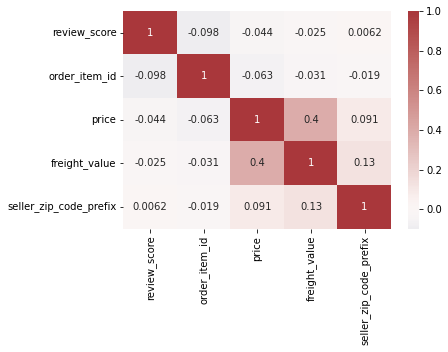

In [ ]:
sns.heatmap(df_5_mn.corr(), cmap = 'vlag', center = 0, annot = True)

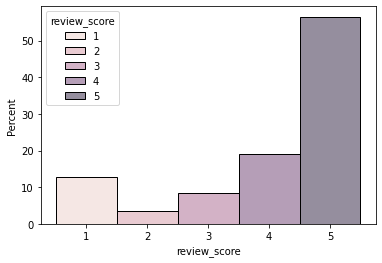

In [ ]:
sns.histplot(data=df_5, x="review_score", stat = 'percent', discrete = True, hue = 'review_score')

In [ ]:
df_volume=df_5[['seller_id','order_id', 'review_score', 'order_item_id', 'price', 'product_id']]
df_volume.groupby('seller_id')['review_score', 'price'].mean().sort_values(by = 'review_score')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,review_score,price
seller_id,,
6d04126aba80df143fd038e711b8fd96,1.0,89.990
b6c6854d4d92a5f6f46be8869da3fa1a,1.0,69.900
34aefe746cd81b7f3b23253ea28bef39,1.0,8.000
b7ba853e9551f4558440881fd3e5c815,1.0,188.400
17adeba047385fb0c67d8e90b4296d21,1.0,269.900
...,...,...
d7827b2af99326a03b0ed9c7a24db0d3,5.0,1455.000
4aba6a02a788d3ec81c03137144d9a80,5.0,89.900
94ca168e8bcb407ab85c5da308863027,5.0,44.860


In [ ]:
df_volume.groupby('seller_id')['product_id'].count()

seller_id
0015a82c2db000af6aaaf3ae2ecb0532      3
001cca7ae9ae17fb1caed9dfb1094831    236
001e6ad469a905060d959994f1b41e4f      1
002100f778ceb8431b7a1020ff7ab48f     56
003554e2dce176b5555353e4f3555ac8      1
                                   ... 
ffcfefa19b08742c5d315f2791395ee5      1
ffdd9f82b9a447f6f8d4b91554cc7dd3     20
ffeee66ac5d5a62fe688b9d26f83f534     14
fffd5413c0700ac820c7069d66d98c89     60
ffff564a4f9085cd26170f4732393726     20
Name: product_id, Length: 3090, dtype: int64

In [ ]:
df_volume.groupby('seller_id')['price'].mean()

seller_id
0015a82c2db000af6aaaf3ae2ecb0532    895.000000
001cca7ae9ae17fb1caed9dfb1094831    104.957754
001e6ad469a905060d959994f1b41e4f    250.000000
002100f778ceb8431b7a1020ff7ab48f     22.400000
003554e2dce176b5555353e4f3555ac8    120.000000
                                       ...    
ffcfefa19b08742c5d315f2791395ee5     69.900000
ffdd9f82b9a447f6f8d4b91554cc7dd3    105.060000
ffeee66ac5d5a62fe688b9d26f83f534    131.418571
fffd5413c0700ac820c7069d66d98c89    147.848333
ffff564a4f9085cd26170f4732393726     71.315000
Name: price, Length: 3090, dtype: float64

In [ ]:
df_ca = df_volume.groupby('seller_id')['product_id'].count()*df_volume.groupby('seller_id')['price'].mean()
df_ca.sort_values()

seller_id
cf6f6bc4df3999b9c6440f124fb2f687         3.50
77128dec4bec4878c37ab7d6169d6f26         6.50
1fa2d3def6adfa70e58c276bb64fe5bb         6.90
702835e4b785b67a084280efca355756         7.60
34aefe746cd81b7f3b23253ea28bef39         8.00
                                      ...    
7c67e1448b00f6e969d365cea6b010ab    188017.85
fa1c13f2614d7b5c4749cbc52fecda94    192774.43
4a3ca9315b744ce9f8e9374361493884    200561.42
53243585a1d6dc2643021fd1853d8905    220740.05
4869f7a5dfa277a7dca6462dcf3b52b2    228071.04
Length: 3090, dtype: float64

In [ ]:
df_note = df_volume.groupby('seller_id')['review_score'].mean()
df_note

seller_id
0015a82c2db000af6aaaf3ae2ecb0532    3.666667
001cca7ae9ae17fb1caed9dfb1094831    3.902542
001e6ad469a905060d959994f1b41e4f    1.000000
002100f778ceb8431b7a1020ff7ab48f    3.982143
003554e2dce176b5555353e4f3555ac8    5.000000
                                      ...   
ffcfefa19b08742c5d315f2791395ee5    1.000000
ffdd9f82b9a447f6f8d4b91554cc7dd3    4.250000
ffeee66ac5d5a62fe688b9d26f83f534    4.214286
fffd5413c0700ac820c7069d66d98c89    3.866667
ffff564a4f9085cd26170f4732393726    2.100000
Name: review_score, Length: 3090, dtype: float64

In [ ]:
df_total = pd.concat([df_ca, df_note], keys = 'seller_id', axis = 1)
df_total.sort_values( by = 's')

,s,e
seller_id,,
cf6f6bc4df3999b9c6440f124fb2f687,3.50,5.000000
77128dec4bec4878c37ab7d6169d6f26,6.50,5.000000
1fa2d3def6adfa70e58c276bb64fe5bb,6.90,1.000000
702835e4b785b67a084280efca355756,7.60,5.000000
34aefe746cd81b7f3b23253ea28bef39,8.00,1.000000
...,...,...
7c67e1448b00f6e969d365cea6b010ab,188017.85,3.348208
fa1c13f2614d7b5c4749cbc52fecda94,192774.43,4.340206
4a3ca9315b744ce9f8e9374361493884,200561.42,3.803931


In [ ]:
from datetime import datetime
from datetime import timedelta
df_5.loc[:,['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','review_answer_timestamp','shipping_limit_date' ]] = df_5.loc[:, ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','review_answer_timestamp','shipping_limit_date']].apply(pd.to_datetime)



In [ ]:
df_5['délai'] = (df_5['order_delivered_customer_date']-df_5['order_approved_at']).dt.days

In [ ]:
df_volume.corr()

,review_score,order_item_id,price
review_score,1.000000,-0.13089,-0.003941
order_item_id,-0.130890,1.00000,-0.061140
price,-0.003941,-0.06114,1.000000


In [ ]:
data = df_5.groupby('review_score')['délai'].mean()
data_1=data.reset_index()

In [ ]:
data_1

,review_score,délai
0,1,18.612339
1,2,14.852933
2,3,13.087643
3,4,11.290051
4,5,9.743866


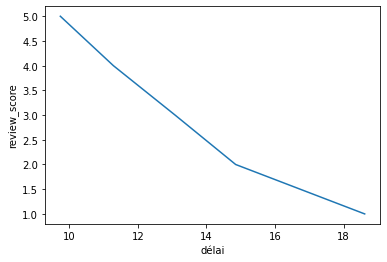

In [ ]:
import seaborn as sns
sns.lineplot(data = data_1, x=data_1['délai'], y =data_1['review_score'])

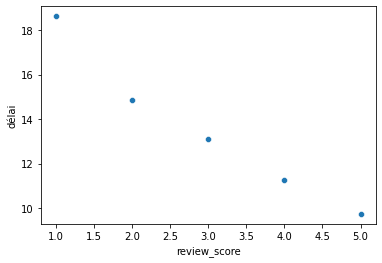

In [ ]:
sns.scatterplot(data = data_1, x = 'review_score', y = 'délai')

In [ ]:
df_5.describe()

,review_score,order_item_id,price,freight_value,seller_zip_code_prefix,délai
count,112372.000000,112372.000000,112372.000000,112372.000000,112372.000000,109997.000000
mean,4.032473,1.196010,120.378962,19.977752,24451.942575,11.508423
std,1.387849,0.691243,182.152386,15.781421,27607.504965,9.327284
min,1.000000,1.000000,0.850000,0.000000,1001.000000,-7.000000
25%,4.000000,1.000000,39.900000,13.070000,6429.000000,6.000000
50%,5.000000,1.000000,74.900000,16.250000,13568.000000,9.000000
75%,5.000000,1.000000,134.900000,21.150000,27930.000000,15.000000
max,5.000000,21.000000,6735.000000,409.680000,99730.000000,208.000000


In [ ]:
df_5['délai_estimée'] = (df_5['order_estimated_delivery_date'] - df_5['order_delivered_customer_date']).dt.days
df_5['délai_estimée']

0          7.0
1          6.0
2          6.0
3          6.0
4         16.0
          ... 
112367    10.0
112368     NaN
112369    13.0
112370    -5.0
112371     7.0
Name: délai_estimée, Length: 112372, dtype: float64

In [ ]:
condition = df_5['délai_estimée'] <0
new_df_5 = df_5[condition]


In [ ]:
new_df_5[new_df_5['délai_estimée']==-189]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,délai,délai_estimée
48725,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,ae83a790a3f01e1c43dd4d2863cebe0c,2,...,ee406bf28024d97771c4b1e8b7e8e219,7a67c85e85bb2ce8582c35f2203ad736,2018-03-01 15:16:14,144.99,17.26,3426,sao paulo,SP,208.0,-189.0


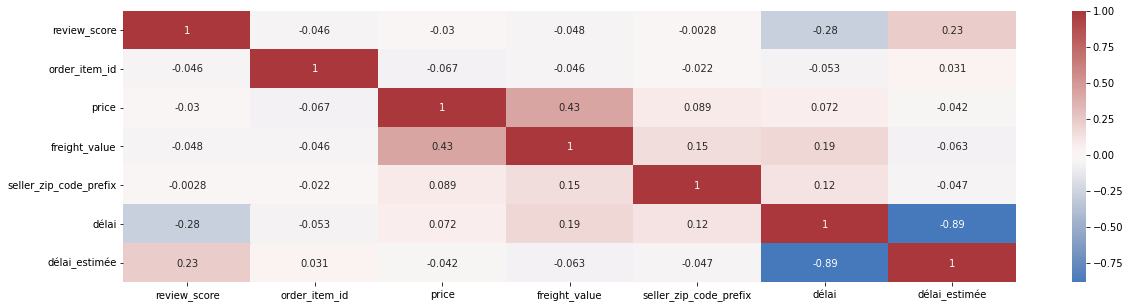

In [ ]:
plt.figure(figsize=(20, 5))
sns.heatmap(new_df_5.corr(), cmap = 'vlag', center = 0, annot = True)

In [ ]:
df_5['review_score'].corr(df_5['délai_estimée'])

0.22902987885409307

In [ ]:
df_5['review_score'].mean()

4.032472502046773

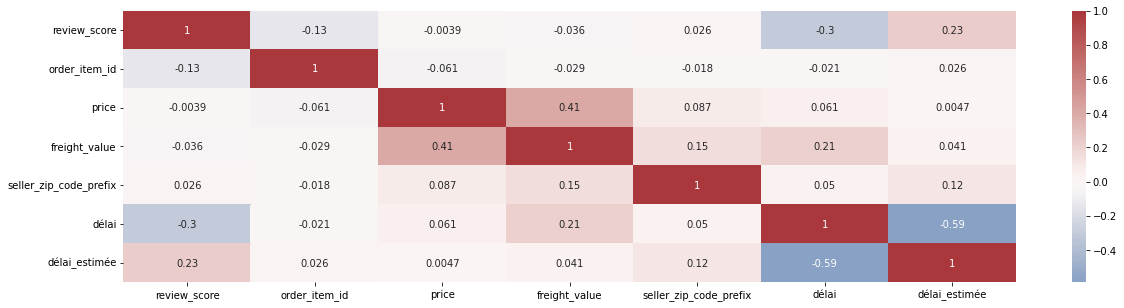

In [ ]:
plt.figure(figsize=(20, 5))
sns.heatmap(df_5.corr(), cmap = 'vlag', center = 0, annot = True)

In [ ]:
df_5_retard = df_5[condition]
df_5_retard['review_score'].mean()

2.5488844761126037

In [ ]:
df_5_retard

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,délai,délai_estimée
101,f7f0b79050e7ef0b1cf7ffceb0aa114a,46fb8cff647939aaf32c4ab5be554501,delivered,2018-08-04 14:40:31,2018-08-07 04:44:36,2018-08-13 15:19:00,2018-08-14 15:08:57,2018-08-10,999ce675f2f793a2360d9809a2b37252,4,...,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-09 04:44:36,116.9,9.33,31570,belo horizonte,SP,7.0,-5.0
140,b7f8b0ec8242c32730504ca558390211,818aa1212d9e31bf20f835eef11cffdd,delivered,2018-03-02 14:56:52,2018-03-02 15:15:28,2018-03-05 20:17:02,2018-03-29 21:45:34,2018-03-20,e800338d2264e19595439c36ec7a8454,1,...,fbc1488c1a1e72ba175f53ab29a248e8,289cdb325fb7e7f891c38608bf9e0962,2018-03-08 15:15:28,119.8,15.59,31570,belo horizonte,SP,27.0,-10.0
184,f11e9516ca2b6091b64f2e2ea0ebebb3,7d527c98f408420a9d5c953e5b89215e,delivered,2018-02-22 20:53:14,2018-02-22 21:28:02,2018-02-23 23:19:09,2018-03-28 22:04:44,2018-03-19,bd18d38a13ec1f63d28aa6206da888b9,1,...,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-02-28 21:28:02,204.0,18.68,14840,guariba,SP,34.0,-10.0
186,80b0f4fc350532f6e0ce9aa81ccde91c,d06f910929d7ece5e8090c5b4ef80b08,delivered,2018-03-01 16:51:27,2018-03-01 17:09:42,2018-03-02 23:57:29,2018-04-05 21:37:26,2018-03-19,b2eb6e036ff001f946cb7229b624ded6,1,...,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-03-07 17:09:42,204.0,14.45,14840,guariba,SP,35.0,-18.0
187,8b37f436aea079bd73bbcbe103d14a0b,63d3bc89cf22616c68960d0d11258a5a,delivered,2018-01-24 20:07:10,2018-01-24 20:19:22,2018-01-25 18:46:57,2018-02-17 19:19:00,2018-02-16,b3cd298f2159bfa933c9f21148175573,4,...,7b35be468d9795a7529f65c50ec87668,4869f7a5dfa277a7dca6462dcf3b52b2,2018-01-30 20:19:22,579.0,15.55,14840,guariba,SP,23.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112287,e3c2135c38233042e0bfa35a97882582,90bfdc2f88cc435b7a16812d26984214,delivered,2018-01-17 22:10:43,2018-01-17 22:19:35,2018-01-23 10:38:45,2018-02-19 13:09:16,2018-02-19,ef2d0fd3ba5f4c191319e1989c5ed8c9,2,...,362917ef32b7ab0660f1d2b1111396ac,344223b2a90784f64136a8a5da012e7f,2018-01-23 22:19:35,10.9,16.79,89117,gaspar,SC,32.0,-1.0
112317,8dcb7601ceb0b144a5fdd0055b91ba28,6b9eb9660bed562d1c735d3fba0cfd60,delivered,2017-06-19 17:11:51,2017-06-19 17:25:18,2017-07-19 16:13:25,2017-08-03 21:03:17,2017-07-20,ad9d44acedaa68be82b5a72f538f89de,1,...,88c44792cd15d55bc4263bf91672e0f6,ca5832c6960267b71041f74bb39e8b12,2017-07-04 17:25:18,79.9,17.81,89820,xanxere,SC,45.0,-15.0
112338,a4a57f1ffa25b90dea9f150fee89db84,c12c796652c71de90173ccac158ae68f,delivered,2017-09-06 17:07:29,2017-09-06 17:15:12,2017-11-06 20:51:56,2017-12-01 17:09:10,2017-10-27,5f12ae31a960e1f46ec6f749df75e5a6,1,...,25d2c18566cb8238ee65ecb9ac0f701b,8e670472e453ba34a379331513d6aab1,2017-09-27 17:15:12,975.0,108.96,36087,juiz de fora,MG,85.0,-36.0
112360,b1866dace5f7daf46e4ef10ed7c3a5e9,eb6cafe1788b71c7e4d0fb96b62c6cb7,delivered,2017-11-20 12:49:35,2017-11-20 13:07:31,2017-11-21 22:55:36,2017-12-27 00:06:56,2017-12-18,e5162d9f0c4aa94b9147401eef42faac,3,...,f22ccf28078d6ba8961033bc6a20bc12,9ef932e837d8b7f392c0bfee9d359dc2,2017-11-24 13:07:31,59.9,19.66,14940,ibitinga,SP,36.0,-10.0


# Semaine 2 : Organisation ("tables intermédiaires")

Avant de répondre à la demande du PDG d'Olist, nous devons rechercher les causes d'un mauvais `review_score`.

Une bonne pratique pour ce genre de problème est de construire plusieurs tables intermédiaires, chacune contenant un unique_id et les informations pertinentes pour cette table.  

Par exemple :

* table des commandes (id, review_score, montant, distance entre le vendeur et le client...)
* table des vendeurs (id, note moyenne par vendeur, temps d'attente moyen, ...)
* table des produits : (id, score moyen d'avis, catégories, couleurs, tailles...)
* table des clients (id, quelques propriétés de ce client)
* table des avis (id, texte traduit, propriétés de ce texte...)

Une fois que tu sera satisfait de tes tables intermédiaires imaginés, tu pourras dans un premier temps exporter les tables de données .sql en fichier .csv, avant de les créer avec le langage Pandas. Tu fera ensuite ton analyse en te servant de ces tables intermédiaires.





# Idées tables intermédiaires


Dans un premier temps, réfléchis avec ton groupe en observant le schéma de la base de données que tu as fait plus haut. Quelles sont les tables intermédiaires à créer pour proposer une analyse consise et pertinente en s'appuyant sur ses dernières ?
Vous pouvez, individuellement ou en groupe, réfléchir à ses tables intermédiaires.
Lundi matin, nous échangerons tous ensemble sur vos idées de tables intermédiaires.
